# Memory Based Collborative Filtering approach

In [ ]:
# UTILITY MODULES
!pip install surprise

In [208]:
# IMPORTS
from surprise import Dataset, Reader, KNNBasic
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import KNNWithMeans

# matplotlib configrations
%matplotlib inline
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

In [168]:
# CONFIGS
NUM_USERS = 8
NUM_CUSINES = 6
RATING_SCALE = (1, 5)
SIM_OPT = {"name": "cosine",
           "user_based": True}
USERS = ["Sarthak", "Tanya", "Prachi", "Ram", "Dodge", "Neha", "Samarth", "Andrej"]

In [206]:
#UTILITY SCRIPTS

def create_data(users):
  """Function for creating artificial dataset
  Args:
    - users: list or numpy array. 
      An array/list of users
  Returns:
  data: DataFrame instance
  """
  cuisines = ["Indian", "Italian", "French", "Mongolian", "Chinese"]
  data = pd.DataFrame()
  #data["u_id"] = []
  #data["cusine"] = []
  #data["rating"] = []
  u_ids = []
  cusines_ = []
  ratings = []
  for u in users:
    #preferences = np.zeros_like(cuisines)
    print(f"Taking cuisine info for {u}")
    for i, e in enumerate(cuisines):
      #s = float(input(f"{e}: "))
      # Generate random ratings b/w 1 and 5
      r = round(np.random.uniform(1.0, 5.0), 3)
      u_ids.append(u)
      cusines_.append(e)
      ratings.append(r)

  data["u_id"] = u_ids
  data["cusine"] = cusines_
  data["rating"] = ratings
  return data

def get_recommendations(user_name=None, cuisines=None, age=None, location=None, gender=None, num_recommendations=5):
  """Function for getting recommendations by retraining the model on new cuisines
  for a particular user and re-filter the results for the introduced constraints
  Args:
  user_name: str
  Name of the user for whom recommendations are to be found out.
  
  cuisines: dict
  A mapping of cuisine type to new value

  age: int
  Age range to select from

  location: str
  Location in which to go for.

  gender: str
  Gender preference
  """
  #data.loc["u_id"==user_name,"cusine"==k]
  #assert rows.shape[0]!=0, "User does not exist in dataset"
  assert len(cuisines) == NUM_CUISINES, f"Cuisines must be {NUM_CUISINES}"
  data.loc[df["u_id"]==user_name,"rating"] = list(map(float, cuisines.values()))

  #print(rows)
  #data[data["u_id"]==user_name] = rows
  #print(data[data["u_id"]==user_name])
  reader = Reader(rating_scale=RATING_SCALE)
  dataset = Dataset.load_from_df(data[["u_id", "cusine", "rating"]], reader)
  trainset = dataset.build_full_trainset()

  print("="*25)
  print("Getting Recommendations ready")
  print("="*25)
  
  algo = KNNWithMeans(k=NUM_USERS//2, sim_options=SIM_OPT, verbose=1)
  algo.fit(trainset)

  # Now getting the predictions with temporarily updated dataset
  
  uid  = trainset.to_inner_uid(user_name)
  pred = algo.get_neighbors(iid=uid, k=num_recommendations)
  # When using age, location and gender constraints, we need to take into 
  # account all/more recommendations
  if len(pred)==0:
    print("Oops! no results for these filter settings!")
  else:
    print("="*15)
    print("Top recommendations")
    print("="*15)

    for i in pred:
      print(trainset.to_raw_uid(i))
   
def plot_similarity_matrix():
  matrix = algo.compute_similarities()
  fig, ax = plt.subplots(1, 1, figsize=(8,8))
  fig.canvas.draw()
  image = ax.imshow(matrix, cmap="jet")
  #labels = ax.get_xticklabels(,)
  fig.colorbar(image)
  ax.set_xticklabels(['']+USERS, rotation=45,
                     fontdict={"fontsize":12, "color":"#914bd6", "fontfamily":"sans-serif"})
  ax.set_yticklabels(['']+USERS, rotation=45,
                     fontdict={"fontsize":12, "color":"#914bd6", "fontfamily":"sans-serif", "alpha":0.9})  
  
  ax.set_title("Cosine Similarity Matrix", fontdict={"fontsize":15, "color":"#e69c12"})

#def update_model(): #TODO

In [156]:
data = create_data(USERS)

Taking cuisine info for Sarthak
Taking cuisine info for Tanya
Taking cuisine info for Prachi
Taking cuisine info for Ram
Taking cuisine info for Dodge
Taking cuisine info for Neha
Taking cuisine info for Samarth
Taking cuisine info for Andrej


In [ ]:
data.sample(5)

,u_id,cusine,rating
31,Samarth,Italian,1.437
33,Samarth,Mongolian,1.425
23,Dodge,Mongolian,1.235
19,Ram,Chinese,2.767
0,Sarthak,Indian,3.426


In [ ]:
df = data
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(df[["u_id", "cusine", "rating"]], reader)
trainset = dataset.build_full_trainset()
algo = KNNWithMeans(k=NUM_USERS//2,sim_options=SIM_OPT, verbose=1)
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [161]:
get_recommendations("Prachi", {"Indian":3.32, "Italian":1.21, "Mongolian":5.0, "Chinese":2.0, "French":2.1})

Before 10    4.32
11    3.21
12    0.00
13    5.00
14    2.10
Name: rating, dtype: float64
After 10    3.32
11    1.21
12    5.00
13    2.00
14    2.10
Name: rating, dtype: float64
Getting Recommendations ready
Computing the cosine similarity matrix...
Done computing similarity matrix.
Top recommendations
Tanya
Sarthak
Ram
Neha
Dodge


In [162]:
# Output the similarity matrix
algo.compute_similarities()

Computing the cosine similarity matrix...
Done computing similarity matrix.


array([[1.        , 0.88288125, 0.81137272, 0.88397651, 0.77477973,
        0.83049813, 0.72061975, 0.93814684],
       [0.88288125, 1.        , 0.79974121, 0.90628691, 0.81132505,
        0.89791096, 0.76151896, 0.8675477 ],
       [0.81137272, 0.79974121, 1.        , 0.97537471, 0.89464731,
        0.76884479, 0.9350418 , 0.93426906],
       [0.88397651, 0.90628691, 0.97537471, 1.        , 0.93020073,
        0.86776937, 0.93191238, 0.96946566],
       [0.77477973, 0.81132505, 0.89464731, 0.93020073, 1.        ,
        0.91128507, 0.93754303, 0.91991511],
       [0.83049813, 0.89791096, 0.76884479, 0.86776937, 0.91128507,
        1.        , 0.74712901, 0.8509637 ],
       [0.72061975, 0.76151896, 0.9350418 , 0.93191238, 0.93754303,
        0.74712901, 1.        , 0.91236909],
       [0.93814684, 0.8675477 , 0.93426906, 0.96946566, 0.91991511,
        0.8509637 , 0.91236909, 1.        ]])

Computing the cosine similarity matrix...
Done computing similarity matrix.


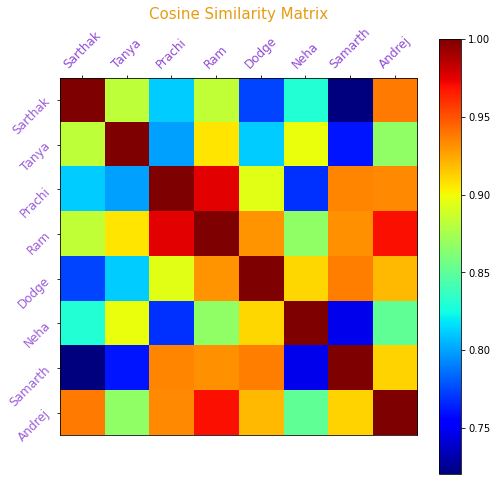

In [207]:
# Visualize the Similarity matrix
plot_similarity_matrix()

# Future Scope

- Model Based Collborative Filtering to prevent training of model at every instance.

## Extras


In [219]:
# Pickling the model
model_file = open("similarity_model.pkl", "wb")
pickle.dump(algo, model_file)
model_file.close()

In [220]:
# Testing if the model is perfectly
new_model_file = open("similarity_model.pkl", "rb")
new_algo = pickle.load(new_model_file)